# Hypothesis Testing in Python

## Hypothesis Testing Fundamentals

### Calculating the sample mean

The `late_shipments` dataset contains supply chain data on the delivery
of medical supplies. Each row represents one delivery of a part. The
`late` columns denotes whether or not the part was delivered late. A
value of `"Yes"` means that the part was delivered late, and a value of
`"No"` means the part was delivered on time.

You'll begin your analysis by calculating a point estimate (or sample
statistic), namely the proportion of late shipments.

In `pandas`, a value's proportion in a categorical DataFrame column can
be quickly calculated using the syntax:

    prop = (df['col'] == val).mean()

`late_shipments` is available, and `pandas` is loaded as `pd`.

**Instructions**

- Print the `late_shipments` dataset.
- Calculate the proportion of late shipments in the sample; that is, the mean cases where the `late` column is `"Yes"`.

**Answer**

In [192]:
pip install pandas pyarrow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [193]:
# added/edited
import pandas as pd
late_shipments = pd.read_feather('late_shipments.feather')

In [231]:
# Print the late_shipments dataset
print(late_shipments)

# Calculate the proportion of late shipments
late_prop_samp = (late_shipments['late'] == "Yes").mean()

# Print the results
print(late_prop_samp)


          id       country managed_by  fulfill_via vendor_inco_term  \
0    36203.0       Nigeria   PMO - US  Direct Drop              EXW   
1    30998.0      Botswana   PMO - US  Direct Drop              EXW   
2    69871.0       Vietnam   PMO - US  Direct Drop              EXW   
3    17648.0  South Africa   PMO - US  Direct Drop              DDP   
4     5647.0        Uganda   PMO - US  Direct Drop              EXW   
..       ...           ...        ...          ...              ...   
995  13608.0        Uganda   PMO - US  Direct Drop              DDP   
996  80394.0    Congo, DRC   PMO - US  Direct Drop              EXW   
997  61675.0        Zambia   PMO - US  Direct Drop              EXW   
998  39182.0  South Africa   PMO - US  Direct Drop              DDP   
999   5645.0      Botswana   PMO - US  Direct Drop              EXW   

    shipment_mode  late_delivery late product_group    sub_classification  \
0             Air            1.0  Yes          HRDT              HIV t

### Calculating a z-score

Since variables have arbitrary ranges and units, we need to standardize
them. For example, a hypothesis test that gave different answers if the
variables were in Euros instead of US dollars would be of little value.
Standardization avoids that.

One standardized value of interest in a hypothesis test is called a
z-score. To calculate it, you need three numbers: the sample statistic
(point estimate), the hypothesized statistic, and the standard error of
the statistic (estimated from the bootstrap distribution).

The sample statistic is available as `late_prop_samp`.

`late_shipments_boot_distn` is a bootstrap distribution of the
proportion of late shipments, available as a list.

`pandas` and `numpy` are loaded with their usual aliases.

**Instructions**

- Hypothesize that the proportion of late shipments is 6%.
- Calculate the standard error from the standard deviation of the
  bootstrap distribution.
- Calculate the z-score.

**Answer**


In [195]:
# added/edited
import numpy as np
late_shipments_boot_distn = [
    late_shipments.sample(n=len(late_shipments), replace=True)['late_delivery'].mean()
    for _ in range(5000)
]

In [196]:
# Hypothesize that the proportion is 6%
late_prop_hyp = 0.06

# Calculate the standard error
std_error = np.std(late_shipments_boot_distn, ddof=1)

# Find z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp) / std_error

# Print z_score
print(z_score)

0.13259455945447696


### Calculating p-values

In order to determine whether to choose the null hypothesis or the
alternative hypothesis, you need to calculate a p-value from the
z-score.

You'll now return to the late shipments dataset and the proportion of
late shipments.

The null hypothesis, $H\_{0}$, is that the proportion of late
shipments is six percent.

The alternative hypothesis, $H\_{A}$, is that the proportion of late
shipments is **greater than** six percent.

The observed sample statistic, `late_prop_samp`, the hypothesized value,
`late_prop_hyp` (6%), and the bootstrap standard error, `std_error` are
available. `norm` from `scipy.stats` has also been loaded without an
alias.

**Instructions**

- Calculate the z-score of `late_prop_samp`.
- Calculate the p-value for the z-score, using a right-tailed test.

**Answer**


In [197]:
pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [198]:
# added/edited
from scipy.stats import norm

In [199]:
# Calculate the z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp) / std_error

# Calculate the p-value
p_value = 1 - norm.cdf(z_score)
                 
# Print the p-value
print(p_value)

0.4472570176770929


### Calculating a confidence interval

If you give a single estimate of a sample statistic, you are bound to be
wrong by some amount. For example, the hypothesized proportion of late
shipments was 6%. Even if evidence suggests the null hypothesis that the
proportion of late shipments is equal to this, for any new sample of
shipments, the proportion is likely to be a little different due to
sampling variability. Consequently, it's a good idea to state a
confidence interval. That is, you say, "we are 95% 'confident' that the
proportion of late shipments is between A and B" (for some value of A
and B).

Sampling in Python
[demonstrated](https://campus.datacamp.com/courses/sampling-in-python/bootstrap-distributions-4?ex=10)
two methods for calculating confidence intervals. Here, you'll use
quantiles of the bootstrap distribution to calculate the confidence
interval.

`late_prop_samp` and `late_shipments_boot_distn` are available; `pandas`
and `numpy` are loaded with their usual aliases.

**Instructions**

- Calculate a 95% confidence interval from `late_shipments_boot_distn`
  using the quantile method, labeling the lower and upper intervals
  `lower` and `upper`.

**Answer**


In [200]:
# Calculate 95% confidence interval using quantile method
lower = np.quantile(late_shipments_boot_distn, 0.025)
upper = np.quantile(late_shipments_boot_distn, 0.975)

# Print the confidence interval
print((lower, upper))

(0.047, 0.076)


## Two-Sample and ANOVA Tests

### Two sample mean test statistic

The hypothesis test for determining if there is a difference between the
means of two populations uses a different type of test statistic to the
z-scores you saw in Chapter 1. It's called "t", and it can be calculated
from three values from each sample using this equation.

\$\$ t = \dfrac{(\bar{x}\_{\text{child}} -
\bar{x}\_{\text{adult}})}{\sqrt{\dfrac{s\_{\text{child}}^2}{n\_{\text{child}}} +
\dfrac{s\_{\text{adult}}^2}{n\_{\text{adult}}}}} \$\$

While trying to determine why some shipments are late, you may wonder if
the weight of the shipments that were on time is **less than** the
weight of the shipments that were late. The `late_shipments` dataset has
been split into a "yes" group, where `late == "Yes"` and a "no" group
where `late == "No"`. The weight of the shipment is given in the
`weight_kilograms` variable.

The sample means for the two groups are available as `xbar_no` and
`xbar_yes`. The sample standard deviations are `s_no` and `s_yes`. The
sample sizes are `n_no` and `n_yes`. `numpy` is also loaded as `np`.

**Instructions**

- Calculate the numerator of the $t$ test statistic.
- Calculate the denominator of the $t$ test statistic.
- Use those two numbers to calculate the $t$ test statistic.

**Answer**

In [201]:
# added/edited
late_yes = late_shipments[late_shipments['late_delivery'] == 1]
late_no = late_shipments[late_shipments['late_delivery'] == 0]
xbar_no = late_no['weight_kilograms'].mean()
xbar_yes = late_yes['weight_kilograms'].mean()
s_no = late_no['weight_kilograms'].std()
s_yes = late_yes['weight_kilograms'].std()
n_no = late_no['weight_kilograms'].count()
n_yes = late_yes['weight_kilograms'].count()
numerator = xbar_no - xbar_yes

In [202]:
# Calculate the numerator of the test statistic
numerator = xbar_no - xbar_yes

# Calculate the denominator of the test statistic
denominator = np.sqrt(s_no ** 2 / n_no + s_yes ** 2 / n_yes)

# Calculate the test statistic
t_stat = numerator / denominator

# Print the test statistic
print(t_stat)

-2.3936661778766433


### From t to p

Previously, you calculated the test statistic for the two-sample problem
of whether the mean weight of shipments is smaller for shipments that
weren't late (`late == "No"`) compared to shipments that were late
(`late == "Yes"`). In order to make decisions about it, you need to
transform the test statistic with a cumulative distribution function to
get a p-value.

Recall the hypotheses:

$H\_{0}$: The mean weight of shipments that weren't late is the same
as the mean weight of shipments that were late.

$H\_{A}$: The mean weight of shipments that weren't late is less than
the mean weight of shipments that were late.

The test statistic, `t_stat`, is available, as are the samples sizes for
each group, `n_no` and `n_yes`. Use a significance level of
`alpha = 0.05`.

`t` has also been imported from `scipy.stats`.

**Instructions**

- Calculate the degrees of freedom for the test.
- Compute the p-value using the test statistic, `t_stat`.

**Answer**


In [203]:
# added/edited
from scipy.stats import t

In [204]:
# Calculate the degrees of freedom
degrees_of_freedom = n_no + n_yes - 2

# Calculate the p-value from the test stat
p_value = t.cdf(t_stat, df=degrees_of_freedom)

# Print the p_value
print(p_value)

0.008432382146249523


### Visualizing the difference

Before you start running hypothesis tests, it's a great idea to perform
some exploratory data analysis; that is, calculating summary statistics
and visualizing distributions.

Here, you'll look at the proportion of county-level votes for the
Democratic candidate in 2012 and 2016, `sample_dem_data`. Since the
counties are the same in both years, these samples are paired. The
columns containing the samples are `dem_percent_12` and
`dem_percent_16`.

`dem_votes_potus_12_16` is available as `sample_dem_data`. `pandas` and
`matplotlib.pyplot` are loaded with their usual aliases.

**Instructions**

- Create a new `diff` column containing the percentage of votes for the
  democratic candidate in 2012 minus the percentage of votes for the
  democratic candidate in 2016.
- Calculate the mean of the `diff` column as `xbar_diff`.
- Calculate the standard deviation of the `diff` column as `s_diff`.
- Plot a histogram of the `diff` column with 20 bins.

**Answer**


In [205]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [206]:
# added/edited
import matplotlib.pyplot as plt 
sample_dem_data = pd.read_feather('dem_votes_potus_12_16.feather')

In [232]:
# Calculate the differences from 2012 to 2016
sample_dem_data['diff'] = sample_dem_data['dem_percent_12'] - sample_dem_data['dem_percent_16']

# Print sample_dem_data
print(sample_dem_data)

       state       county  dem_percent_12  dem_percent_16       diff
0    Alabama      Bullock       76.305900       74.946921   1.358979
1    Alabama      Chilton       19.453671       15.847352   3.606319
2    Alabama         Clay       26.673672       18.674517   7.999155
3    Alabama      Cullman       14.661752       10.028252   4.633500
4    Alabama     Escambia       36.915731       31.020546   5.895185
..       ...          ...             ...             ...        ...
495  Wyoming        Uinta       19.065464       14.191263   4.874201
496  Wyoming     Washakie       20.131846       13.948610   6.183235
497   Alaska   District 3       33.514582       16.301064  17.213518
498   Alaska  District 18       61.284271       52.810051   8.474220
499   Alaska  District 24       42.913980       39.405286   3.508694

[500 rows x 5 columns]


In [233]:
# Find the mean of the diff column
xbar_diff = sample_dem_data['diff'].mean()

# Print xbar_diff
print(xbar_diff)

# Find the standard deviation of the diff column
s_diff = sample_dem_data['diff'].std()

# Print s_diff
print(s_diff)

6.829312660106834
5.040139140132317


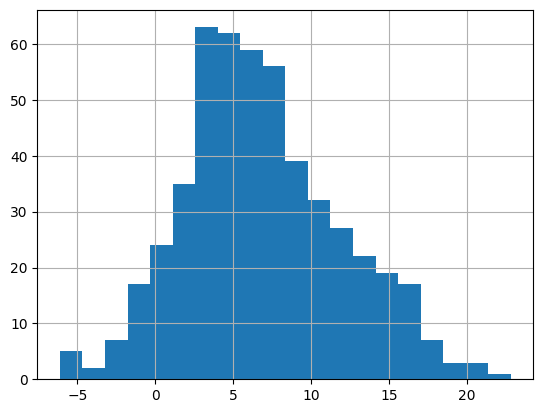

In [208]:
# Plot a histogram of diff with 20 bins
sample_dem_data['diff'].hist(bins=20)
plt.show()

### Using ttest()

Manually calculating test statistics and transforming them with a CDF to
get a p-value is a lot of effort to compare two sample means. The
comparison of two sample means is called a t-test, and the `pingouin`
Python package has a `.ttest()` method to accomplish it. This method
provides some flexibility in how you perform the test.

As in the previous exercise, you'll explore the difference between the
proportion of county-level votes for the Democratic candidate in 2012
and 2016 to identify if the difference is significant. The hypotheses
are as follows:

$H\_{0}$: The proportion of democratic votes in 2012 and 2016 were the
same. $H\_{A}$: The proportion of democratic votes in 2012 and 2016
were different.

`sample_dem_data` is available and has the columns `diff`,
`dem_percent_12`, and `dem_percent_16` in addition to the `state` and
`county` names. `pingouin` and has been loaded along with `pandas` as
`pd`.

**Instructions**

- Conduct a t-test on the sample differences (the `diff` column of
  `sample_dem_data`), using an appropriate alternative hypothesis chosen
  from `"two-sided"`, `"less"`, and `"greater"`.
- Conduct a paired test on the democratic votes in 2012 and 2016 (the `dem_percent_12` and `dem_percent_16` columns of `sample_dem_data`), using an appropriate alternative hypothesis.

**Answer**


In [209]:
pip install pingouin

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [210]:
# added/edited
import pingouin

In [234]:
# Conduct a t-test on diff
test_results = pingouin.ttest(x=sample_dem_data['diff'], 
                              y=0, 
                              alternative="two-sided")
                              
# Print the test results
print(test_results)

                T  dof alternative          p-val         CI95%   cohen-d  \
T-test  30.298384  499   two-sided  3.600634e-115  [6.39, 7.27]  1.354985   

              BF10  power  
T-test  2.246e+111    1.0  


In [235]:
# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pingouin.ttest(x=sample_dem_data['dem_percent_12'], 
                                     y=sample_dem_data['dem_percent_16'],
                                     paired=True,
                                     alternative="two-sided")
                              
# Print the paired test results
print(paired_test_results)

                T  dof alternative          p-val         CI95%   cohen-d  \
T-test  30.298384  499   two-sided  3.600634e-115  [6.39, 7.27]  0.454202   

              BF10  power  
T-test  2.246e+111    1.0  


### Visualizing many categories

So far in this chapter, we've only considered the case of differences in
a numeric variable between two categories. Of course, many datasets
contain more categories. Before you get to conducting tests on many
categories, it's often helpful to perform exploratory data analysis
(EDA), calculating summary statistics for each group and visualizing the
distributions of the numeric variable for each category using box plots.

Here, we'll return to the late shipments data, and how the price of each
package (`pack_price`) varies between the three shipment modes
(`shipment_mode`): `"Air"`, `"Air Charter"`, and `"Ocean"`.

`late_shipments` is available; `pandas` and `matplotlib.pyplot` are
loaded with their standard aliases, and `seaborn` is loaded as `sns`.

**Instructions**

- Group `late_shipments` by `shipment_mode` and calculate the mean
  `pack_price` for each group, storing the result in
  `xbar_pack_by_mode`.
- Group `late_shipments` by `shipment_mode` and calculate the standard deviation `pack_price` for each group, storing the result in `s_pack_by_mode`.
- Create a boxplot from `late_shipments` with `"pack_price"` as `x` and `"shipment_mode"` as `y`.

**Answer**


In [212]:
# added/edited
import seaborn as sns

In [236]:
# Calculate the mean pack_price for each shipment_mode
xbar_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].mean()

# Print the grouped means
print(xbar_pack_by_mode)

shipment_mode
Air            39.705116
Air Charter     4.226667
Ocean           6.432273
Name: pack_price, dtype: float64


In [237]:
# Calculate the standard deviation of the pack_price for each shipment_mode
s_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].std()

# Print the grouped standard deviations
print(s_pack_by_mode)

shipment_mode
Air            48.959427
Air Charter     0.992969
Ocean           5.303047
Name: pack_price, dtype: float64


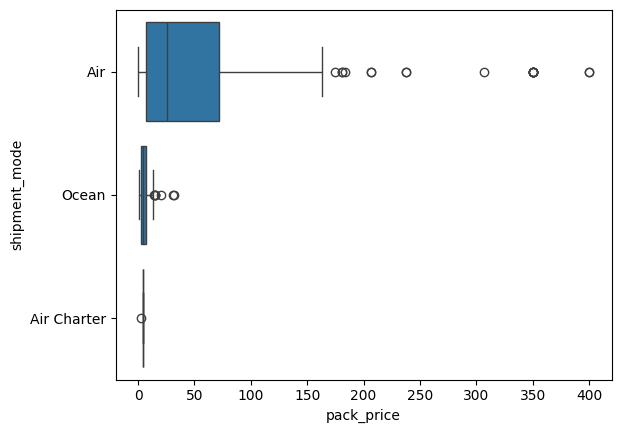

In [214]:
# Boxplot of shipment_mode vs. pack_price
sns.boxplot(x="pack_price", y="shipment_mode", data=late_shipments)
plt.show()

### Conducting an ANOVA test

The box plots made it look like the distribution of pack price was
different for each of the three shipment modes. However, it didn't tell
us whether the mean pack price was different in each category. To
determine that, we can use an ANOVA test. The null and alternative
hypotheses can be written as follows.

$H\_{0}$: Pack prices for every category of shipment mode are the
same.

$H\_{A}$: Pack prices for some categories of shipment mode are
different.

Use a significance level of 0.1.

`late_shipments` is available and `pingouin` has been loaded.

**Instructions**

- Run an ANOVA on `late_shipments` investigating `'pack_price'` (the
  dependent variable) between the groups of `'shipment_mode'`.

**Answer**


In [215]:
# Run an ANOVA for pack_price across shipment_mode
anova_results = pingouin.anova(data=late_shipments,
                               dv="pack_price",
                               between="shipment_mode")

# Print anova_results
print(anova_results)

          Source  ddof1  ddof2        F         p-unc       np2
0  shipment_mode      2    997  21.8646  5.089479e-10  0.042018


### Pairwise t-tests

The ANOVA test didn't tell you which categories of shipment mode had
significant differences in pack prices. To pinpoint which categories had
differences, you could instead use pairwise t-tests.

`late_shipments` is available and `pingouin` has been loaded.

**Instructions**

- Perform pairwise t-tests on `late_shipments`'s `pack_price` variable,
  grouped by `shipment_mode`, without doing any p-value adjustment.
- Modify the pairwise t-tests to use the Bonferroni p-value adjustment.

**Answer**


In [238]:
# Perform a pairwise t-test on pack price, grouped by shipment mode
pairwise_results = pingouin.pairwise_tests(data=late_shipments, 
                                           dv="pack_price",
                                           between="shipment_mode",
                                           padjust="none")

# Print pairwise_results
print(pairwise_results)

        Contrast            A            B  Paired  Parametric          T  \
0  shipment_mode          Air  Air Charter   False        True  21.153462   
1  shipment_mode          Air        Ocean   False        True  19.312655   
2  shipment_mode  Air Charter        Ocean   False        True  -3.170654   

          dof alternative         p-unc       BF10    hedges  
0  601.222302   two-sided  1.160890e-74  3.878e+76  0.726051  
1  986.136131   two-sided  9.786259e-71   7.99e+66  0.710612  
2   35.615026   two-sided  3.123012e-03     15.277 -0.423775  


In [239]:
# Modify the pairwise t-tests to use Bonferroni p-value adjustment
pairwise_results = pingouin.pairwise_tests(data=late_shipments, 
                                           dv="pack_price",
                                           between="shipment_mode",
                                           padjust="bonf")

# Print pairwise_results
print(pairwise_results)

        Contrast            A            B  Paired  Parametric          T  \
0  shipment_mode          Air  Air Charter   False        True  21.153462   
1  shipment_mode          Air        Ocean   False        True  19.312655   
2  shipment_mode  Air Charter        Ocean   False        True  -3.170654   

          dof alternative         p-unc        p-corr p-adjust       BF10  \
0  601.222302   two-sided  1.160890e-74  3.482670e-74     bonf  3.878e+76   
1  986.136131   two-sided  9.786259e-71  2.935878e-70     bonf   7.99e+66   
2   35.615026   two-sided  3.123012e-03  9.369037e-03     bonf     15.277   

     hedges  
0  0.726051  
1  0.710612  
2 -0.423775  


## Proportion Tests

### Test for single proportions

In Chapter 1, you calculated a p-value for a test hypothesizing that the
proportion of late shipments was **greater than** 6%. In that chapter,
you used a bootstrap distribution to estimate the standard error of the
statistic. An alternative is to use an equation for the standard error
based on the sample proportion, hypothesized proportion, and sample
size.

$$ z = \dfrac{\hat{p} - p_{0}}{\sqrt{\dfrac{p_{0}*(1-p_{0})}{n}}} $$

You'll revisit the p-value using this simpler calculation.

`late_shipments` is available. `pandas` and `numpy` are available under
their usual aliases, and `norm` is loaded from `scipy.stats`.

**Instructions**

- Hypothesize that the proportion of late shipments is 6%.
- Calculate the sample proportion of shipments where `late` equals
  `"Yes"`.
- Calculate the number of observations in the sample.
- Calculate the numerator and denominator of the z-score.
- Calculate the z-score as the ratio of these numbers.
- Transform the z-score into a p-value, remembering that this is a "greater than" alternative hypothesis.

**Answer**

In [217]:
# Hypothesize that the proportion of late shipments is 6%
p_0 = 0.06

# Calculate the sample proportion of late shipments
p_hat = (late_shipments['late'] == "Yes").mean()

# Calculate the sample size
n = len(late_shipments)

# Print p_hat and n
print(p_hat, n)

0.061 1000


In [218]:
# Calculate the numerator and denominator of the test statistic
numerator = p_hat - p_0
denominator = np.sqrt(p_0 * (1 - p_0) / n)

# Calculate the test statistic
z_score = numerator / denominator

# Print the result
print(z_score)

0.13315591032282698


In [219]:
# Calculate the p-value from the z-score
p_value = 1 - norm.cdf(z_score)

# Print the p-value
print(p_value)

0.44703503936503364


### Test of two proportions

You may wonder if the amount paid for freight affects whether or not the
shipment was late. Recall that in the `late_shipments` dataset, whether
or not the shipment was late is stored in the `late` column. Freight
costs are stored in the `freight_cost_group` column, and the categories
are `"expensive"` and `"reasonable"`.

The hypotheses to test, with `"late"` corresponding to the proportion of
late shipments for that group, are

$H\_{0}$: $late\_{\text{expensive}} - late\_{\text{reasonable}} = 0$

$H\_{A}$: $late\_{\text{expensive}} - late\_{\text{reasonable}} \>
0$

`p_hats` contains the estimates of population proportions (sample
proportions) for each `freight_cost_group`:

    freight_cost_group  late
    expensive           Yes     0.082569
    reasonable          Yes     0.035165
    Name: late, dtype: float64

`ns` contains the sample sizes for these groups:

    freight_cost_group
    expensive     545
    reasonable    455
    Name: late, dtype: int64

`pandas` and `numpy` have been imported under their usual aliases, and
`norm` is available from `scipy.stats`.

**Instructions**

- Calculate the pooled sample proportion, $\hat{p}$, from `p_hats` and
  `ns`.

$$ \hat{p} = \frac{n_{\text{expensive}} \times
\hat{p}_{\text{expensive}} + n_{\text{reasonable}} \times
\hat{p}_{\text{reasonable}}}{n_{\text{expensive}} +
n_{\text{reasonable}}} $$

- Calculate the standard error of the sample *using this equation.*

$$\text{SE}({\hat{p}}\_{\text{expensive}} - {\hat{p}}\_{\text{reasonable}}) = \sqrt{\frac{\hat{p} \times (1 - \hat{p})}{n\_{\text{expensive}}} + \frac{\hat{p} \times (1 - \hat{p})}{n\_{\text{reasonable}}}}$$

- Calculate `p_hat` multiplied by `(1 - p_hat)`.
- Divide `p_hat_times_not_p_hat` by the number of `"reasonable"` rows
    and by the number of `"expensive"` rows, and sum those two values.
- Calculate `std_error` by taking the square root of
    `p_hat_times_not_p_hat_over_ns`.

-   Calculate the z-score *using the following equation.*

$$z = \frac{({\hat{p}}\_{\text{expensive}} - {\hat{p}}\_{\text{reasonable}})}{\text{SE}({\hat{p}}\_{\text{expensive}} - {\hat{p}}\_{\text{reasonable}})}$$

**Answer**


In [220]:
# added/edited
late_shipments['freight_cost_group'] = late_shipments['freight_cost_groups'].fillna('expensive')
p_hats = late_shipments.groupby(['freight_cost_group'])['late_delivery'].mean()
ns = late_shipments.groupby('freight_cost_group').size()

In [221]:
# Calculate the pooled estimate of the population proportion
p_hat = (p_hats["reasonable"] * ns["reasonable"] + p_hats["expensive"] * ns["expensive"]) / (ns["reasonable"] + ns["expensive"])

# Print the result
print(p_hat)

# Calculate p_hat one minus p_hat
p_hat_times_not_p_hat = p_hat * (1 - p_hat)

# Divide this by each of the sample sizes and then sum
p_hat_times_not_p_hat_over_ns = p_hat_times_not_p_hat / ns["expensive"] + p_hat_times_not_p_hat / ns["reasonable"]

# Calculate the standard error
std_error = np.sqrt(p_hat_times_not_p_hat_over_ns)

# Print the result
print(std_error)

# Calculate the z-score
z_score = (p_hats["expensive"] - p_hats["reasonable"]) / std_error

# Print z_score
print(z_score)

# Calculate the p-value from the z-score
p_value = 1 - norm.cdf(z_score)

# Print p_value
print(p_value)

0.061
0.015198256303165816
3.1190401865206128
0.0009072060637050905


### proportions_ztest() for two samples

That took a lot of effort to calculate the p-value, so while it is
useful to see how the calculations work, it isn't practical to do in
real-world analyses. For daily usage, it's better to use the
`statsmodels` package.

Recall the hypotheses.

$H\_{0}$: $late\_{\text{expensive}} - late\_{\text{reasonable}} = 0$

$H\_{A}$: $late\_{\text{expensive}} - late\_{\text{reasonable}} \>
0$

`late_shipments` is available, containing the `freight_cost_group`
column. `numpy` and `pandas` have been loaded under their standard
aliases, and `proportions_ztest` has been loaded from
`statsmodels.stats.proportion`.

**Instructions**

- Get the counts of the `late` column grouped by `freight_cost_group`.
- Extract the number of `"Yes"`'s for the two `freight_cost_group` into a `numpy` array, specifying the `'expensive'` count and then `'reasonable'`.
- Determine the overall number of rows in each `freight_cost_group` as a `numpy` array, specifying the `'expensive'` count and then `'reasonable'`.
- Run a z-test using `proportions_ztest()`, specifying `alternative` as `"larger"`.

**Answer**


In [222]:
# added/edited
from statsmodels.stats.proportion import proportions_ztest

In [240]:
# Count the late column values for each freight_cost_group
late_by_freight_cost_group = late_shipments.groupby("freight_cost_group")['late'].value_counts()

# Print the counts
print(late_by_freight_cost_group)

freight_cost_group  late
expensive           No      500
                    Yes      45
reasonable          No      438
                    Yes      16
Name: count, dtype: int64


In [241]:
# Count the late column values for each freight_cost_group
late_by_freight_cost_group = late_shipments.groupby("freight_cost_group")['late'].value_counts()

# Create an array of the "Yes" counts for each freight_cost_group
success_counts = np.array([45, 16])

# Create an array of the total number of rows in each freight_cost_group
n = np.array([45 + 500, 16 + 439])

# Run a z-test on the two proportions
stat, p_value = proportions_ztest(count=success_counts, nobs=n,
                                  alternative="larger")

# Print the results
print(stat, p_value)

3.1190401865206128 0.0009072060637051224


### Performing a chi-square test

The *chi-square independence test* compares proportions of successes of
one categorical variable across the categories of another categorical
variable.

Trade deals often use a form of business shorthand in order to specify
the exact details of their contract. These are International Chamber of
Commerce (ICC) international commercial terms, or *incoterms* for short.

The `late_shipments` dataset includes a `vendor_inco_term` that
describes the incoterms that applied to a given shipment. The choices
are:

- [`EXW`](https://www.investopedia.com/terms/e/exw.asp): "Ex works". The
  buyer pays for transportation of the goods.
- [`CIP`](https://www.investopedia.com/terms/c/carriage-and-insurance-paid-cip.asp):
  "Carriage and insurance paid to". The seller pays for freight and
  insurance until the goods board a ship.
- [`DDP`](https://www.investopedia.com/terms/d/delivery-duty-paid.asp):
  "Delivered duty paid". The seller pays for transportation of the goods
  until they reach a destination port.
- [`FCA`](https://www.investopedia.com/terms/f/fca.asp): "Free carrier".
  The seller pays for transportation of the goods.

Perhaps the incoterms affect whether or not the freight costs are
expensive. Test these hypotheses with a significance level of `0.01`.

$H\_{0}$: `vendor_inco_term` and `freight_cost_group` are independent.

$H\_{A}$: `vendor_inco_term` and `freight_cost_group` are associated.

`late_shipments` is available, and the following have been loaded:
`matplotlib.pyplot` as `plt`, `pandas` as `pd`, and `pingouin`.

**Instructions**

- Calculate the proportion of `freight_cost_group` in `late_shipments`
  grouped by `vendor_inco_term`.
- Unstack the `.value_counts()` result to be in wide format instead of long.
- Create a proportional stacked bar plot with bars filled based on `freight_cost_group` across the levels of `vendor_inco_term`.
- Perform a chi-square test of independence on `freight_cost_group` and `vendor_inco_term` in the `late_shipments` dataset.

**Answer**


In [224]:
# added/edited
late_shipments = late_shipments[late_shipments.vendor_inco_term != 'DDU']

In [225]:
# Proportion of freight_cost_group grouped by vendor_inco_term
props = late_shipments.groupby('vendor_inco_term')['freight_cost_group'].value_counts(normalize=True)

# Print props
print(props)

vendor_inco_term  freight_cost_group
CIP               reasonable            0.607143
                  expensive             0.392857
DDP               expensive             0.550000
                  reasonable            0.450000
EXW               expensive             0.587432
                  reasonable            0.412568
FCA               reasonable            0.657658
                  expensive             0.342342
Name: proportion, dtype: float64


In [226]:
# Convert props to wide format
wide_props = props.unstack()

# Print wide_props
print(wide_props)

freight_cost_group  expensive  reasonable
vendor_inco_term                         
CIP                  0.392857    0.607143
DDP                  0.550000    0.450000
EXW                  0.587432    0.412568
FCA                  0.342342    0.657658


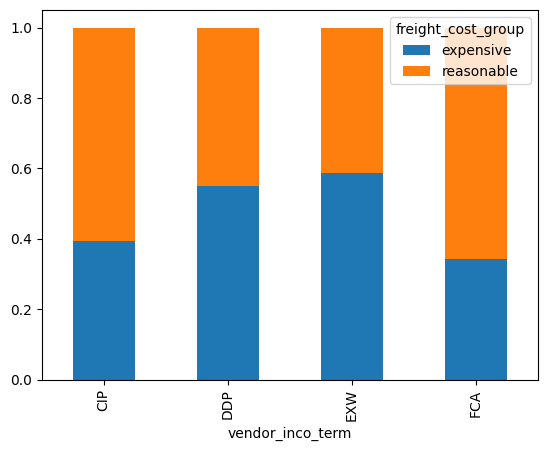

In [227]:
# Proportional stacked bar plot of freight_cost_group vs. vendor_inco_term
wide_props.plot(kind="bar", stacked=True)
plt.show()

In [228]:
# Determine if freight_cost_group and vendor_inco_term are independent
expected, observed, stats = pingouin.chi2_independence(data=late_shipments, x="vendor_inco_term", y="freight_cost_group")

# Print results
print(stats[stats['test'] == 'pearson']) 

      test  lambda       chi2  dof      pval    cramer    power
0  pearson     1.0  28.940828  3.0  0.000002  0.170205  0.99775


### Visualizing goodness of fit

The *chi-square goodness of fit test* compares proportions of each level
of a categorical variable to hypothesized values. Before running such a
test, it can be helpful to visually compare the distribution in the
sample to the hypothesized distribution.

Recall the vendor incoterms in the `late_shipments` dataset. You
hypothesize that the four values occur with these frequencies in the
population of shipments.

- `CIP`: 0.05
- `DDP`: 0.1
- `EXW`: 0.75
- `FCA`: 0.1

These frequencies are stored in the `hypothesized` DataFrame.

The `incoterm_counts` DataFrame stores the `.value_counts()` of the
`vendor_inco_term` column.

`late_shipments` is available; `pandas` and `matplotlib.pyplot` are
loaded with their standard aliases.

**Instructions**

- Find the total number of rows in `late_shipments`.
- Add a column named `n` to the `hypothesized` DataFrame that is the `hypothesized` `prop` column times `n_total`.
- Create a bar graph of `'n'` versus `'vendor_inco_term'` for the `incoterm_counts` data, specifying a red color.
- Add blue bars to the plot showing the same results from the `hypothesized` DataFrame, specifying an `alpha` of `0.5`.

**Answer**


In [258]:
# added/edited
hypothesized_dict = {
    "vendor_inco_term": ["CIP", "DDP", "EXW", "FCA"],
    "prop": [0.05, 0.10, 0.75, 0.10]
}
hypothesized = pd.DataFrame(hypothesized_dict, index=[1, 2, 0, 3])
incoterm_counts = late_shipments.groupby('vendor_inco_term')['vendor_inco_term'].count().reset_index(name='n')

In [262]:
# Find the number of rows in late_shipments
n_total = len(late_shipments)

# Print n_total
print(n_total)

# Create n column that is prop column * n_total
hypothesized["n"] = hypothesized["prop"] * n_total

# Print the modified hypothesized DataFrame
print(hypothesized)

999
  vendor_inco_term  prop       n
1              CIP  0.05   49.95
2              DDP  0.10   99.90
0              EXW  0.75  749.25
3              FCA  0.10   99.90


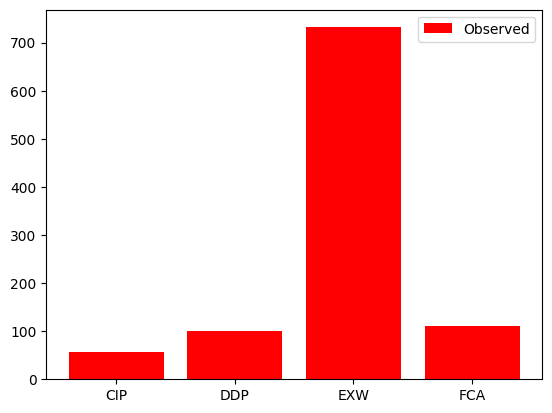

In [263]:
# Plot a red bar graph of n vs. vendor_inco_term for incoterm_counts
plt.bar(incoterm_counts['vendor_inco_term'], incoterm_counts['n'], color="red", label="Observed")
plt.legend()
plt.show()

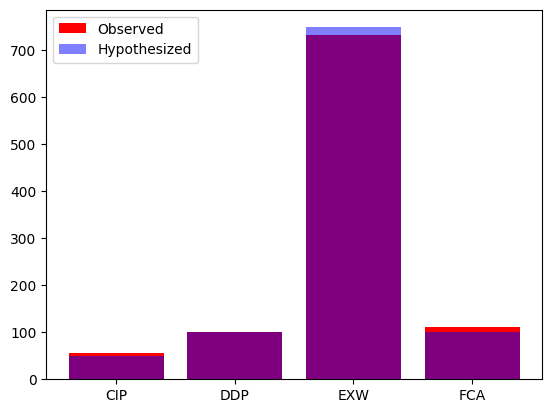

In [264]:
# Plot a red bar graph of n vs. vendor_inco_term for incoterm_counts
plt.bar(incoterm_counts['vendor_inco_term'], incoterm_counts['n'], color="red", label="Observed")

# Add a blue bar plot for the hypothesized counts
plt.bar(hypothesized['vendor_inco_term'], hypothesized['n'], alpha=0.5, color="blue", label="Hypothesized")
plt.legend()
plt.show()

### Performing a goodness of fit test

The bar plot of `vendor_inco_term` suggests that the distribution across
the four categories was quite close to the hypothesized distribution.
You'll need to perform a *chi-square goodness of fit test* to see
whether the differences are statistically significant.

Recall the hypotheses for this type of test:

$H\_{0}$: The sample matches with the hypothesized distribution.

$H\_{A}$: The sample does not match with the hypothesized
distribution.

To decide which hypothesis to choose, we'll set a significance level of
`0.1`.

`late_shipments`, `incoterm_counts`, and `hypothesized` from the last
exercise are available. `chisquare` from `scipy.stats` has been loaded.

**Instructions**

- Using the `incoterm_counts` and `hypothesized` datasets, perform a
  chi-square goodness of fit test on the incoterm counts, `n`.

**Answer**


In [265]:
# added/edited
from scipy.stats import chisquare

In [266]:
# Perform a goodness of fit test on the incoterm counts n
gof_test = chisquare(f_obs=incoterm_counts['n'], 
                     f_exp=hypothesized['n'])

# Print gof_test results
print(gof_test)

Power_divergenceResult(statistic=2.3633633633633613, pvalue=0.5004909543758689)


## Non-Parametric Tests

### Testing sample size

In order to conduct a hypothesis test and be sure that the result is
fair, a sample must meet three requirements: it is a random sample of
the population, the observations are independent, and there are enough
observations. Of these, only the last condition is easily testable with
code.

The minimum sample size depends on the type of hypothesis tests you want
to perform. You'll now test some scenarios on the `late_shipments`
dataset.

Note that the `.all()` method from `pandas` can be used to check if all
elements are true. For example, given a DataFrame `df` with numeric
entries, you check to see if all its elements are less than `5`, using
`(df < 5).all()`.

`late_shipments` is available, and `pandas` is loaded as `pd`.

**Instructions**

- Get the count of each value in the `freight_cost_group` column of
  `late_shipments`.
- Insert a suitable number to inspect whether the counts are "big
  enough" for a two sample t-test.

<!-- -->

- Get the count of each value in the `late` column of `late_shipments`.
- Insert a suitable number to inspect whether the counts are "big
  enough" for a one sample proportion test.

<!-- -->

- Get the count of each value in the `freight_cost_group` column of
  `late_shipments` grouped by `vendor_inco_term`.
- Insert a suitable number to inspect whether the counts are "big
  enough" for a chi-square independence test.

<!-- -->

- Get the count of each value in the `shipment_mode` column of
  `late_shipments`.
- Insert a suitable number to inspect whether the counts are "big
  enough" for an ANOVA test.

**Answer**

In [268]:
# Count the freight_cost_group values
counts = late_shipments['freight_cost_group'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 30).all())

freight_cost_group
expensive     545
reasonable    454
Name: count, dtype: int64
True


In [269]:
# Count the late values
counts = late_shipments['late'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 10).all())

late
No     938
Yes     61
Name: count, dtype: int64
True


In [270]:
# Count the values of freight_cost_group grouped by vendor_inco_term
counts = late_shipments.groupby('vendor_inco_term')['freight_cost_group'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 5).all())

vendor_inco_term  freight_cost_group
CIP               reasonable             34
                  expensive              22
DDP               expensive              55
                  reasonable             45
EXW               expensive             430
                  reasonable            302
FCA               reasonable             73
                  expensive              38
Name: count, dtype: int64
True


In [271]:
# Count the shipment_mode values
counts = late_shipments['shipment_mode'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 30).all())

shipment_mode
Air            905
Ocean           88
Air Charter      6
Name: count, dtype: int64
False


### Wilcoxon signed-rank test

You'll explore the difference between the proportion of county-level
votes for the Democratic candidate in 2012 and 2016 to identify if the
difference is significant.

`sample_dem_data` is available, and has columns `dem_percent_12` and
`dem_percent_16` in addition to `state` and `county` names. The
following packages have also been loaded: `pingouin` and `pandas` as
`pd`.

**Instructions**

- Conduct a paired t-test on the percentage columns using an appropriate
  alternative hypothesis.

<!-- -->

- Conduct a Wilcoxon-signed rank test on the same columns.

**Answer**


In [273]:
# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pingouin.ttest(x=sample_dem_data['dem_percent_12'], 
                                     y=sample_dem_data['dem_percent_16'],
                                     paired=True,
                                     alternative="two-sided")

# Print paired t-test results
print(paired_test_results)

                T  dof alternative          p-val         CI95%   cohen-d  \
T-test  30.298384  499   two-sided  3.600634e-115  [6.39, 7.27]  0.454202   

              BF10  power  
T-test  2.246e+111    1.0  


In [274]:
# Conduct a Wilcoxon test on dem_percent_12 and dem_percent_16
wilcoxon_test_results = pingouin.wilcoxon(x=sample_dem_data['dem_percent_12'], 
                                          y=sample_dem_data['dem_percent_16'],
                                          alternative="two-sided")

# Print Wilcoxon test results
print(wilcoxon_test_results)


           W-val alternative         p-val       RBC      CLES
Wilcoxon  2401.0   two-sided  1.780396e-77  0.961661  0.644816


### Wilcoxon-Mann-Whitney

Another class of non-parametric hypothesis tests are called *rank sum
tests*. Ranks are the positions of numeric values from smallest to
largest. Think of them as positions in running events: whoever has the
fastest (smallest) time is rank 1, second fastest is rank 2, and so on.

By calculating on the ranks of data instead of the actual values, you
can avoid making assumptions about the distribution of the test
statistic. It's more robust in the same way that a median is more robust
than a mean.

One common rank-based test is the Wilcoxon-Mann-Whitney test, which is
like a non-parametric t-test.

`late_shipments` is available, and the following packages have been
loaded: `pingouin` and `pandas` as `pd`.

**Instructions**

- Select `weight_kilograms` and `late` from `late_shipments`, assigning
  the name `weight_vs_late`.
- Convert `weight_vs_late` from long-to-wide format, setting `columns`
  to `'late'`.
- Run a Wilcoxon-Mann-Whitney test for a difference in
  `weight_kilograms` when the shipment was late and on-time.

**Answer**


In [275]:
# Select the weight_kilograms and late columns
weight_vs_late = late_shipments[["weight_kilograms", "late"]]

# Convert weight_vs_late into wide format
weight_vs_late_wide = weight_vs_late.pivot(columns='late', 
                                           values='weight_kilograms')

# Run a two-sided Wilcoxon-Mann-Whitney test on weight_kilograms vs. late
wmw_test = pingouin.mwu(x=weight_vs_late_wide['No'],
                        y=weight_vs_late_wide['Yes'],
                        alternative='two-sided')

# Print the test results
print(wmw_test)

       U-val alternative     p-val       RBC      CLES
MWU  19131.0   two-sided  0.000014  0.331294  0.334353


### Kruskal-Wallis

Recall that the Kruskal-Wallis test is a non-parametric version of an
ANOVA test, comparing the means across multiple groups.

`late_shipments` is available, and the following packages have been
loaded: `pingouin` and `pandas` as `pd`.

**Instructions**

- Run a Kruskal-Wallis test on `weight_kilograms` between the different
  shipment modes in `late_shipments`.

**Answer**


In [277]:
# Run a Kruskal-Wallis test on weight_kilograms vs. shipment_mode
kw_test = pingouin.kruskal(data=late_shipments, 
                           dv='weight_kilograms',
                           between='shipment_mode')

# Print the results
print(kw_test)

                Source  ddof1           H         p-unc
Kruskal  shipment_mode      2  124.983244  7.248254e-28
